<a href="https://colab.research.google.com/github/it21208/Novelty-inspection-detection/blob/master/exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Date=10-November-2020  -->
<!-- Name=Alexandros Ioannidis -->
<!-- Unsupervised ML Exercise -->

Date=09-November-2020
Name=Alexandros-Ioanndidis
Task=Unsupervised-ML

### Part A: Theoretical aspects

#### Mr Aloupis between the cell I will be entering new information to me (in raw text and markdown format) which I find domain relevant. 
#### It's a good way for me to remind myself this domain related info, when I look this code after a period of time.

**Types of frauds** = *1. Credit card frauds, 2. Telecommunication frauds, 2. Computer intrusions, 3. Bankruptcy fraud, 4. Theft fraud/counterfeit fraud, 5. Application fraud, 6. Behavioral fraud.*

In [ ]:
import pandas as pd
import numpy as np

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
# uploaded['creditcard.csv']
# original_data = pd.read_csv(io.BytesIO(uploaded[''creditcard.csv'']))

# Kaggle Tips: Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the 
# Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
'''
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
'''
original_data = pd.read_csv("creditcard.csv")

# convert time to hours
original_data["Time"] = original_data["Time"].apply(lambda x : x / 3600 % 24)


# check for duplicate values
NoDuplicates_data = original_data.copy()
NoDuplicates_data.drop_duplicates(subset=None, inplace=True)
print('Shape of previous dataframe after removal of duplicates = {}\nShape of new ' \
      'dataframe after removal of duplicates =' \
      ' {}'.format(original_data.shape, NoDuplicates_data.shape))


row_dim1 = (original_data.shape)[0]
row_dim2 = (NoDuplicates_data.shape)[0]
if row_dim1 != row_dim2:
    print('{} duplicates found and removed.'.format((row_dim1-row_dim2)))
else:
    print('No duplicates found')

Shape of previous dataframe after removal of duplicates = (284807, 31)
Shape of new dataframe after removal of duplicates = (283726, 31)
1081 duplicates found and removed.


In [ ]:
data_withoutLastCol = NoDuplicates_data.iloc[:,:-1]

# I make a  subset of the data in case I need it later on.
top_100000_data_withoutLastCol = data_withoutLastCol.head(100000)


print('shape of data without duplicates = {}\nshape of data without last column = {}\nshape of top_100000_data_withoutLastCol ' \
      '= {}'.format(NoDuplicates_data.shape, data_withoutLastCol.shape, top_100000_data_withoutLastCol.shape))

shape of data without duplicates = (283726, 31)
shape of data without last column = (283726, 30)
shape of top_100000_data_withoutLastCol = (100000, 30)


In [ ]:
# This is only used by me to check how the labels I will try to produce for the unlabelled dataset
# compare against the actual labels to understand if I'm doing ok 
df_class_actual = NoDuplicates_data.iloc[:,-1:]
np_class_arr = df_class_actual.to_numpy()

#  convert the DataFrame to NumPy format by calling .values, 
# the resulting numpy.ndarray has the same dimensions as my original DataFrame
#  .flatten() to collapse it into one dimension & cast it to list
lst_class_data = list(df_class_actual.values.flatten())
print('Number of frauds in data = {} out of {} unique transactions.'.format(lst_class_data.count(1), len(df_class_actual)))
print('Percentage of transactions that are fraudelent = {}%.'.format(round(lst_class_data.count(1)/len(df_class_actual), 4)*100))

# again I will use this (mainly the y_actuall_test) only to compare it with my predicted labels 
# I will not fit with this.
cutoff_point = 250000
y_actuall_train = lst_class_data[:cutoff_point]
y_actuall_test = lst_class_data[cutoff_point:]

Number of frauds in data = 473 out of 283726 unique transactions.
Percentage of transactions that are fraudelent = 0.16999999999999998%.


#### Quickly define a function which at any given time can give a train(60%), test (20%) and dev set (20%) for the top_100000_data_withoutLastCol data structure. In case it is needed.

In [ ]:
import numpy as np

def train_validate_test_split(df):
    #df.sample(frac=1, random_state=42) # if we want to shuffle the whole dataset
    train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])
    return train, validate, test

In [ ]:
# get train dev/valid and test sets from 100000_data_withoutLastCol 
train, validate, test = train_validate_test_split(data_withoutLastCol)
print('shape of train data = {}\nshape of validate data = {}\nshape of' \
      'test data = {}'.format(train.shape, validate.shape, test.shape))

shape of train data = (170235, 30)
shape of validate data = (56745, 30)
shape oftest data = (56746, 30)


In [ ]:
print('Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have' \
      ' not been transformed with PCA are \'Time\' and \'Amount\'.\n')
print(data_withoutLastCol.describe())

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       14.537139       0.005917      -0.004135       0.001613   
std         5.846094       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%        10.597500      -0.915951      -0.600321      -0.889682   
50%        15.008889       0.020384       0.063949       0.179963   
75%        19.329167       1.316068       0.800283       1.026960   
max        23.999444       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.4

In [ ]:
# Check for missing values in columns 
print(data_withoutLastCol.isna().any())
print('*************')
# checks that the number of nulls in the row is the number of columns minus 1
tempLst = list(data_withoutLastCol.isnull().sum(axis=1) == len(data_withoutLastCol.columns) - 1)
print('No nulls in any row.') if True not in tempLst else print('There are {} null' \
                                                               ' values.'.format(tempLst.count(True)))


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
dtype: bool
*************
No nulls in any row.


In [ ]:
print(NoDuplicates_data_withoutLastCol.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

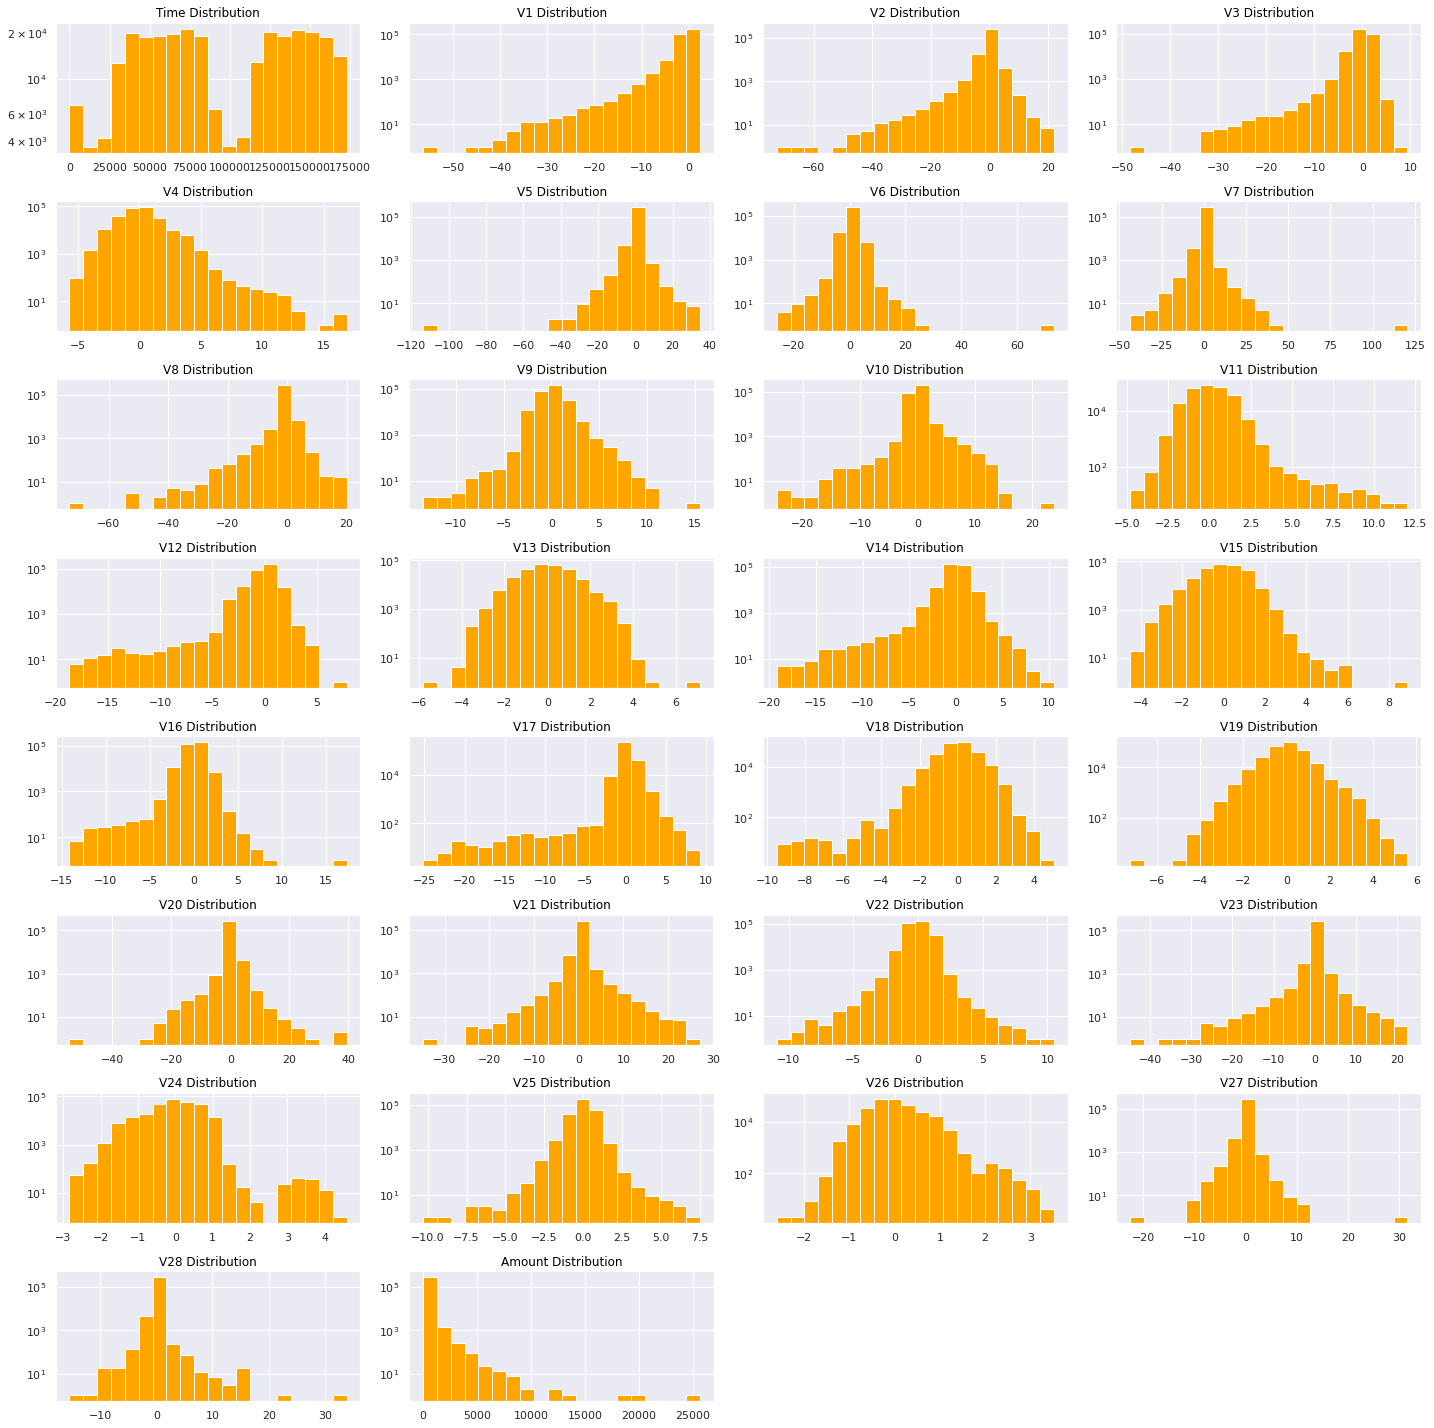

In [ ]:
import matplotlib.pyplot as plt 

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='orange')
        ax.set_title(feature+" Distribution",color='black')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
draw_histograms(NoDuplicates_data_withoutLastCol,NoDuplicates_data_withoutLastCol.columns,8,4)

                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


<AxesSubplot:ylabel='Amount'>

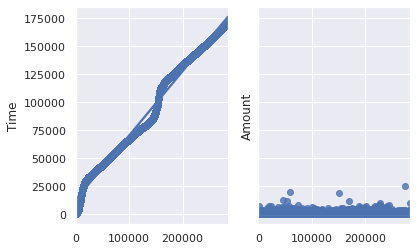

In [ ]:
import seaborn as sns

# get standard statistics for the non V# columns 
print(NoDuplicates_data_withoutLastCol.loc[:, ['Time', 'Amount']].describe())

idx = np.array(NoDuplicates_data_withoutLastCol.index.tolist(), dtype='float')  # make an array of x-values
# call regplot on each axes
# wanted to check if a pattern can be seen from linear regression of time and amount (two different measures)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=idx, y=NoDuplicates_data_withoutLastCol['Time'], ax=ax1)
sns.regplot(x=idx, y=NoDuplicates_data_withoutLastCol['Amount'], ax=ax2)

/home/pfb16181/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


/home/pfb16181/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


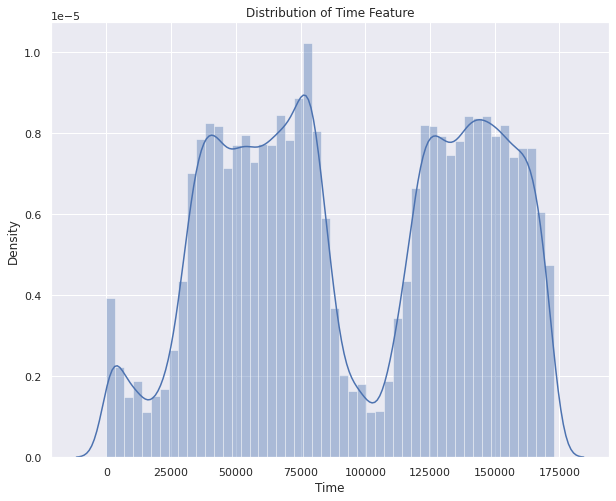

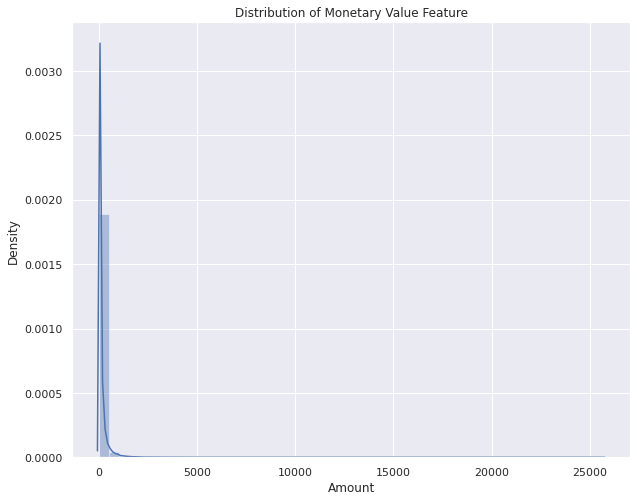

In [ ]:
# check distribution of each column
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
print(sns.distplot(NoDuplicates_data_withoutLastCol.Time))

plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
print(sns.distplot(NoDuplicates_data_withoutLastCol.Amount))

In [ ]:
try:
    import sklearn
except:
    #IPython runs any command starting with ! on the shell
    !pip install sklearn
    import sklearn
    
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA

def get_pca_df(df):
    # time index is not stationary so we don't include it for dimensionality reduction of the dataset
    x = df[df.columns[1:30]].to_numpy()
    x = preprocessing.MinMaxScaler().fit_transform(x)
    pca = decomposition.PCA(n_components=2)
    pca_result = pca.fit_transform(x)
    print('pca_result = {}'.format(pca.explained_variance_ratio_))
    pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2'])
    return pca_df

    
def show_pca_df(pca_df, y):
    pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)
    ax = Axes3D(plt.figure(figsize=(8, 8)))
    ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
    ax.set_xlabel("pc_1")
    ax.set_ylabel("pc_2")
    ax.set_zlabel("pc_3")
    plt.show()
    return None

   
pca_df = get_pca_df(NoDuplicates_data_withoutLastCol)
print('dataset with reduced dimensionality =>\n {}'.format(pca_df))

pca_result = [0.13539008 0.12605004]
dataset with reduced dimensionality =>
             pc_1      pc_2
0       0.008786 -0.031400
1      -0.045638  0.020459
2      -0.092965 -0.023743
3      -0.158848 -0.035157
4       0.019609  0.081728
...          ...       ...
283721 -0.068224  0.041783
283722 -0.137353 -0.064561
283723  0.086133 -0.015843
283724  0.017208  0.088728
283725  0.000092 -0.133749

[283726 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# y_actuall_test
pca_df_train = pca_df.head(cutoff_point)
pca_df_test = pca_df.tail(len(pca_df) - cutoff_point)
print(pca_df_train.shape, pca_df_test.shape)

X_train = list(pca_df_train.iloc[:,0].values.flatten())
Y_train = pca_df_train.iloc[:,1].values.flatten()
rounded_Y_train = [round(num) for num in Y_train]

print('number of frauds in the rounded_Y_train = {}'.format(rounded_Y_train.count(1)))

X_test = list(pca_df_test.iloc[:,0].values.flatten())
Y_test = pca_df_test.iloc[:,1].values.flatten()
rounded_Y_test = [round(num) for num in Y_test]

print(rounded_Y_test.count(1))

# print('X_train = ', X_train)
# print('rounded_Y_train = ', rounded_Y_train)
# print('X_test = ', X_test)
# print('rounded_Y_test = ', rounded_Y_test)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(np.array(X_train).reshape(-1, 1), np.array(rounded_Y_train).reshape(-1, 1))
y_predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print(list(y_predicted).count(1))

(250000, 2) (33726, 2)
number of frauds in the rounded_Y_train = 12
2


/home/pfb16181/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0


##### I made an effort to perform dimensionality reduction and then feed the new feature to a random forest - decision tree but these do not do well in learning how to label the data because the rounded_Y_train contains few 1s  The decision tree predicts better but this is not good enough.   

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.array(X_train).reshape(-1, 1), np.array(rounded_Y_train).reshape(-1, 1))
y_predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print(list(y_predicted).count(1))

1


####  I will try to do some data exploration with the time and amount columns which aren't PCA components and use the class column only to see If there is a pattern when frauds are detected.

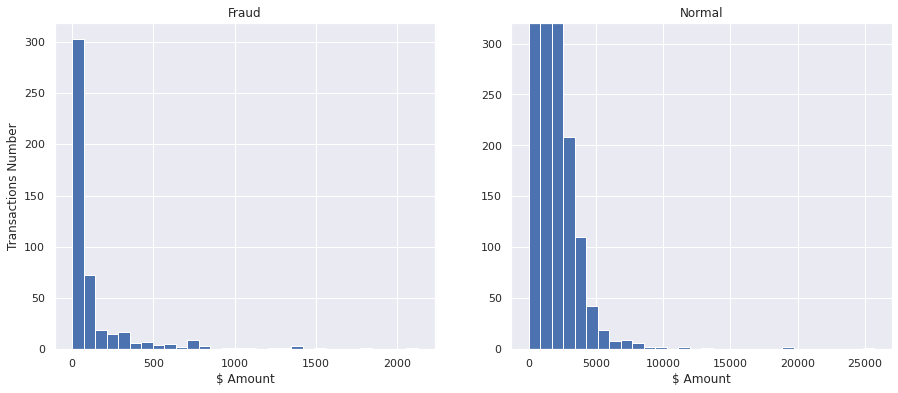

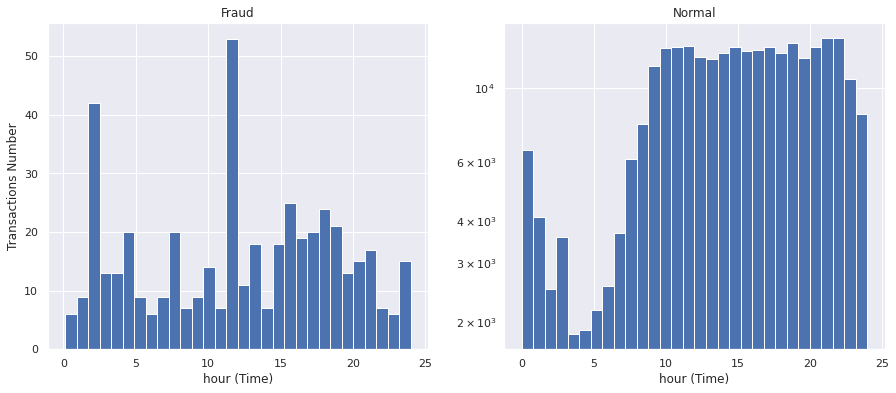

In [ ]:
import matplotlib.pyplot as plt 

NoDuplicates_data_fraud = NoDuplicates_data[NoDuplicates_data['Class'] == 1]
NoDuplicates_data_normal = NoDuplicates_data[NoDuplicates_data['Class'] == 0]
''' ============================================ '''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30
ax1.hist(NoDuplicates_data_fraud['Amount'], bins=bins)
ax2.hist(NoDuplicates_data_normal['Amount'], bins=bins)
ax1.set_title('Fraud')
ax2.set_title('Normal')
ax1.set_xlabel('$ Amount')
ax2.set_xlabel('$ Amount')
ax1.set_ylabel('Transactions Number')
ax2.set_ylim(0, 320)
plt.show()
''' ============================================ '''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30
ax1.hist(NoDuplicates_data_fraud['Time'], bins=bins)
ax2.hist(NoDuplicates_data_normal['Time'], bins=bins)
ax1.set_title('Fraud')
ax2.set_title('Normal')
ax1.set_xlabel('hour (Time)')
ax2.set_xlabel('hour (Time)')
ax1.set_ylabel('Transactions Number')
ax2.set_yscale('log')
plt.show()

#### Most frauds happen on transactions <= 500 dollars and almost all frauds are transactions <= 800  but there are outliers as well near the ~1300 dollars amount. 

In [ ]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
# time, class
temp_df_time = NoDuplicates_data.iloc[:,0]
temp_df_class = NoDuplicates_data.iloc[:,-1]

data = np.array([ list(temp_df_time.values.flatten()), list(temp_df_class.values.flatten())])
clusters = outlier_detection.fit_predict(data)

if list(clusters).count(-1) > 0:
    print('{} Outliers exist'.format(list(clusters).count(-1)))
else:
    print('No Outliers')

2 Outliers exist


#### It is also noticeable that most frauds happen at near 2AM and 12h

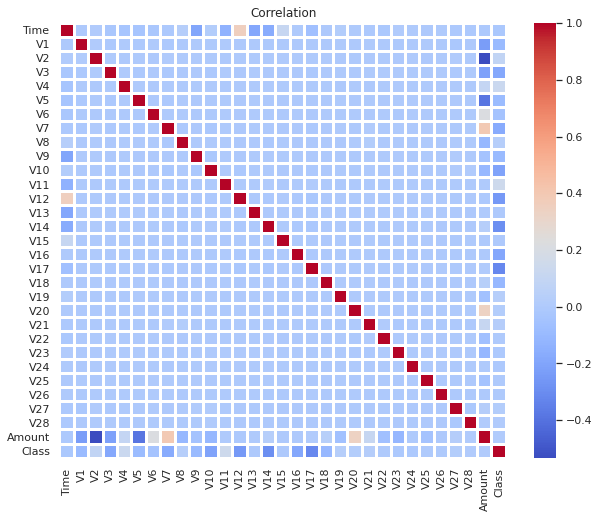

In [ ]:
corr = NoDuplicates_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

##### * t-distributed stochastic neighbor embedding (t-SNE) is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding.
##### * It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. 
##### * Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

> <span style="color:blue"> *I will use t-SNE to notice how the transactions are similar.* </span><br/>

> <span style="color:darkorange"> *Representation learning is able to handle imbalanced data.* </span> 

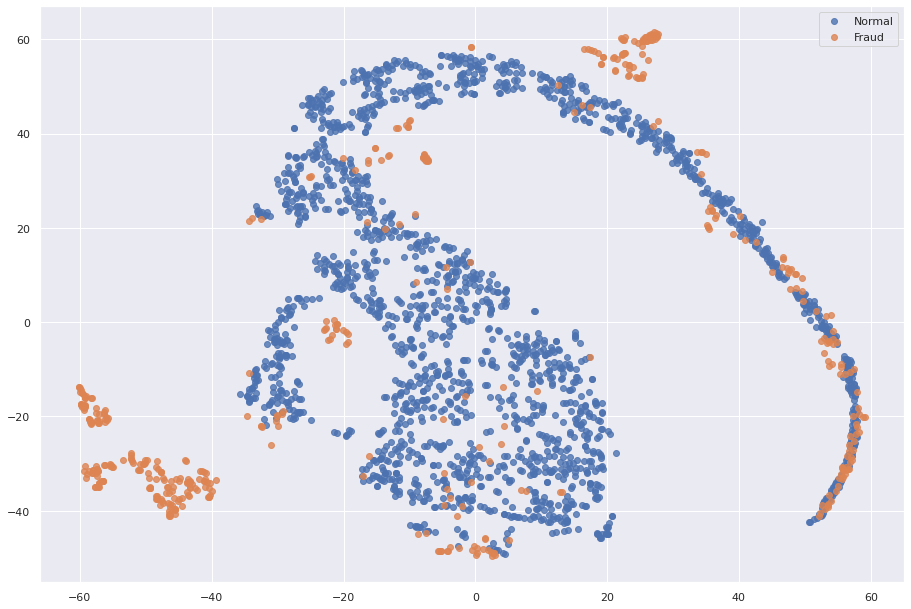

In [ ]:
from sklearn.manifold import TSNE

normal_sample = NoDuplicates_data[NoDuplicates_data['Class'] == 0].sample(2000)
df_tsne = normal_sample.append(NoDuplicates_data_fraud).sample(frac=1).reset_index(drop=True)
# -------
X_tsne = df_tsne.drop(['Class'], axis = 1).values
y_tsne = df_tsne["Class"].values
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
# -------
X_tsne = tsne.fit_transform(X_tsne)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
#-------&&&&&&&&&&&&&&&&&&&&&&-------##-------&&&&&&&&&&&&&&&&&&&&&&-------##-------&&&&&&&&&&&&&&&&&&&&&&-------#
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1], alpha=0.8, label='Normal')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1], alpha=0.8, label='Fraud')
ax.legend(loc='best')

<span style="color:brown"> We notice from the scatter plot above that the fraud incidents and the normal transcations are not clustered/grouped well. There are several fraud incidents that are in between the vast majority of normal transaction dots. </span>

### Compress the data and reconstruct it. If the reconstructed data is not similar to the original one, we have a fraud

In [ ]:
from sklearn.model_selection import train_test_split

# QUICK REMINDER: data_withoutLastCol is essentially the oririnal data without the duplicates 
# and without the CLASS data column.
X = data_withoutLastCol

y = NoDuplicates_data['Class'] # see following markdown cell

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('train shape =',X_train.shape,'\t test shape =', X_val.shape)

train shape = (226980, 30) 	 test shape = (56746, 30)


### The actual labels are used to evaluate the algorithm. But also so that the autoencoders afterwards are trained on a Normal incident data set before they can detect anomalies on the test set... Novelty detection

#### <span style="color:red"> **Novelty detection**: *is the mechanism by which an intelligent organism is able to identify an incoming sensory pattern as being unknown up to now. If the pattern is sufficiently prominent (obvious) or associated with a high positive or strong negative utility, it will be given computational resources for effective future processing. The principle is long known in neurophysiology.* </span> 

#### I reduce the dimensionality of the data again but this time from 30 features to 10 features instead of 2 features and calculate the reconstruction score.

In [ ]:
from sklearn.metrics import mean_squared_error

def getReconstructionScores():   
    scores = []
    for n in range(2, 31):
        pca = PCA(n_components=n)
        pca.fit(X_train)
        X_tt = pca.transform(X_train)
        X_dt = pca.inverse_transform(X_tt)
        scores.append(mean_squared_error(X_train, X_dt))
    scores = np.array(scores)
    return(scores)
    
scores = getReconstructionScores()
n_components = 10
pca = PCA(n_components=n_components)
print(scores.argmin() + 2)
print(pca.fit(X_train))

30
PCA(n_components=10)


<span style="color:red"> * =======**********===============**********===============**********===============**********===============**********===============**********===============********** * </span>

### Part B: Practical aspects

#### Train eval

In [ ]:
X_tt = pca.transform(X_train)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

# Initialise list to store the scores calculated using the mean_squared_error function
# on the row by row contents on the X_train and X_dt dataframe.
reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
# We then utilise the list and the row labels of the X_train dataframe to create a one column 
# ('reconstruction_score') dataframe. 
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

# We get the Mean-Median-Standard Deviation of flattened array 
rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

# We sort the rc_scores dataframe in descending order by it's single column values
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

# Select the row labels after dropping the null values found in the rows where reconstruction scores are 
# larger than the median of the reconstruction plus the multiplied by 2 reconstruction standard deviation score.
top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
# We get a list of the <<y_train>> dataframe row labels where fraudelent incidents occur. 
train_fraud_index = list(y_train[y_train == 1].index)
# And print the length to see out of curiosity how many frauds are in the y_train dataframe. 
print(len(train_fraud_index))

378


Text(0, 0.5, 'Number of samples')

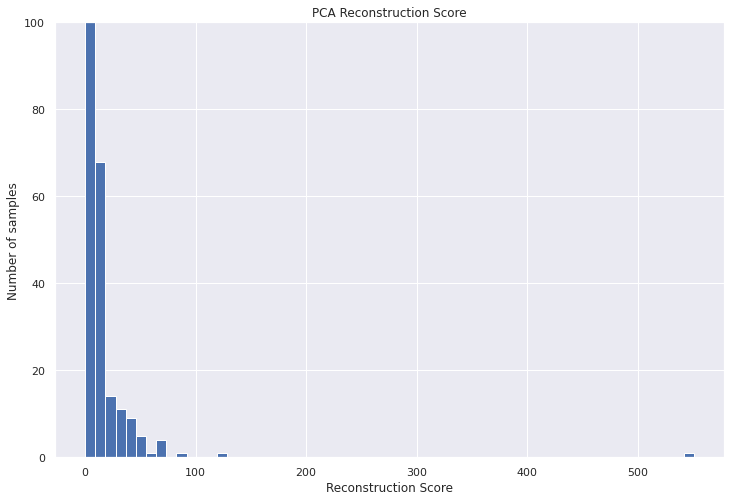

In [ ]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('PCA Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

#### Most samples have a low reconstruction scores 

In [ ]:
from sklearn.metrics import classification_report

pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1

# y_train => Actual target values
# pred['fraud'] => Estimated target values from reconstuction scores
print(classification_report(y_train, pred['fraud']))
print('Rate of transactions to investigate:',round(len(top_scores_idx) / len(X_train) * 100, 4), '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.00      0.00      0.00       378

    accuracy                           1.00    226980
   macro avg       0.50      0.50      0.50    226980
weighted avg       1.00      1.00      1.00    226980

Rate of transactions to investigate: 0.0965 %


In [ ]:
# Val eval - Repetition of the steps in the cell immediately after the markdown box with the "Train eval" text.  
X_tt = pca.transform(X_val)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
val_fraud_index = list(y_val[y_val == 1].index)

In [ ]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1
    
print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', round(len(top_scores_idx) / len(X_val) * 100,4), '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.23      0.54      0.32        95

    accuracy                           1.00     56746
   macro avg       0.62      0.77      0.66     56746
weighted avg       1.00      1.00      1.00     56746

Rate of transations to investigate: 0.3859 %


In [ ]:
X_pca_tsne = pca.transform(X_train)
X_pca_tsne = pd.DataFrame(X_pca_tsne, index=X_train.index)
# However, the autoencoders afterwards need to be trained on a Normal incident data set before they can
# detect anomalies on the test set, which means we have to know in advance what normal data is...Novelty detection
X_pca_tsne['Class'] = y_train
normal_sample = X_pca_tsne[X_pca_tsne['Class'] == 0].sample(2000)
df_fraud = X_pca_tsne[X_pca_tsne['Class'] == 1]
df_tsne = normal_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

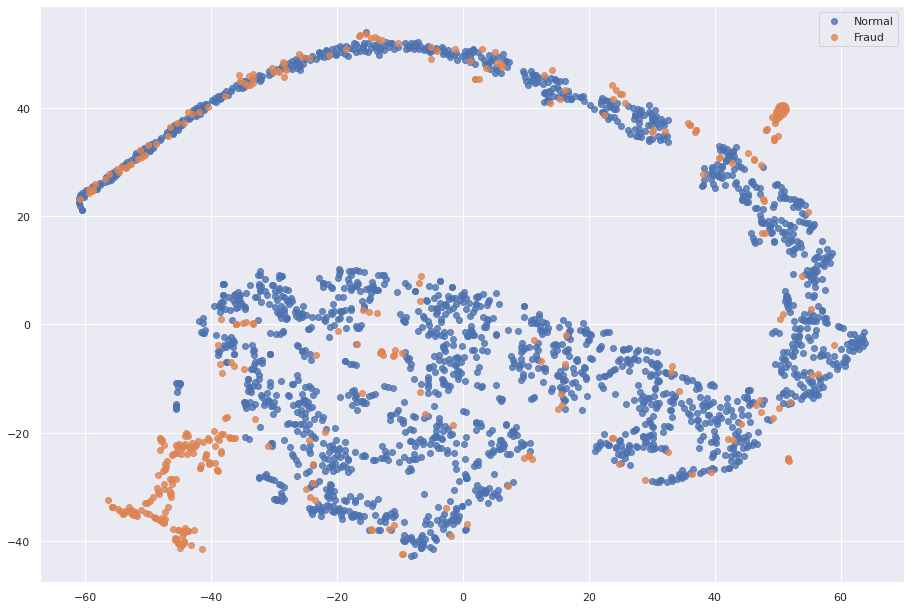

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1], alpha=0.8, label='Normal')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1], alpha=0.8, label='Fraud')
ax.legend(loc='best')

 #### However, it can detect a group of abnormal transactions which can include fraudulent and normal transactions that are difficult to reconstruct. This subset (2000 records) is much smaller than the original data set. 
 >  <span style="color:green">+ This is the main advantage of the autoencoder to reduce the dataset to be manually labeled.</span>

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_tscaled = ss.fit_transform(X_train.values)
X_train = pd.DataFrame(X_tscaled, columns=X_train.columns, index=X_train.index)

X_vscaled = ss.transform(X_val.values)
X_val = pd.DataFrame(X_vscaled, columns=X_val.columns, index=X_val.index)

#### An autoencoder is a type of ANN used to learn data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a dataset, typically for dimensionality reduction, by training the network to ignore signal “noise”. 
>  <span style="color:purple"> Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name </span>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

def get_autoencoder_model(input_dim, encoder_l1, encoder_l2, epochs):
    # Building and returning the MODEL
    inputs = Input(shape=(input_dim,))
    # ENCODE HIDDEN layers    
    x = Dense(encoder_l1, activation='relu')(inputs) # layer1 = Dense(units=hidden_nodes1, activation="sigmoid")(inputs)
    x = Dense(encoder_l2, activation='relu')(x) # layer2 = Dense(units=hidden_nodes2, activation="sigmoid")(layer1)
    # encoder = Dropout(dropout_prob,seed=dropout_seed)(encoder)
    # Decode HIDDEN layers
    x = Dense(encoder_l2, activation='tanh')(x) # layer3 = Dense(units=hidden_nodes3, activation="sigmoid")(layer2)
    x = Dense(encoder_l1, activation='tanh')(x) # layer3 = Dropout(dropout_prob,seed=dropout_seed)(layer3)
    # Defining OUTPUT
    output = Dense(X.shape[1], activation='relu')(x) # output = Dense(units=output_nodes, activation="softmax")(layer3)          
    # Defining the AUTOENCODER
    autoencoder = Model(inputs, output)
    lr = 0.0001
    adam = Adam(lr=lr, decay=(lr/epochs))
    # Compiling the MODEL
    autoencoder.compile(optimizer='Adam',loss='mean_squared_error', metrics=['accuracy'])
    print(autoencoder.summary())
    return autoencoder

epochs = 300
input_dim = X.shape[1]
encoder_l1 = 100
encoder_l2 = 50
autoencoder = get_autoencoder_model(input_dim, encoder_l1, encoder_l2, epochs)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_31 (Dense)             (None, 30)                3030      
Total params: 18,830
Trainable params: 18,830
Non-trainable params: 0
_______________________________________________________

Text(0.5, 1.0, 'Training and validation loss')

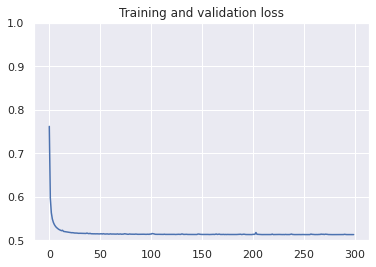

In [ ]:
history = autoencoder.fit(X_train.values, X_train.values, batch_size=2048, epochs=epochs, shuffle=True, verbose=0)
loss = history.history['loss']
ts = range(epochs)
plt.plot(ts, loss)
plt.ylim([0.5,1.0])
plt.title('Training and validation loss')

In [ ]:
from tensorflow.keras.models import Sequential

encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.add(autoencoder.layers[1])
encoder.add(autoencoder.layers[2])

decoder = Sequential()
decoder.add(autoencoder.layers[3])
decoder.add(autoencoder.layers[4])
decoder.add(autoencoder.layers[5])

In [ ]:
X_tt = encoder.predict(X_train)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

In [ ]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1
    
print(classification_report(y_train, pred['fraud']))
print('Rate of transations to investigate:', round(len(top_scores_idx) / len(X_train) * 100,4), '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.00      0.00      0.00       378

    accuracy                           1.00    226980
   macro avg       0.50      0.50      0.50    226980
weighted avg       1.00      1.00      1.00    226980

Rate of transations to investigate: 0.0965 %


/home/pfb16181/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Number of samples')

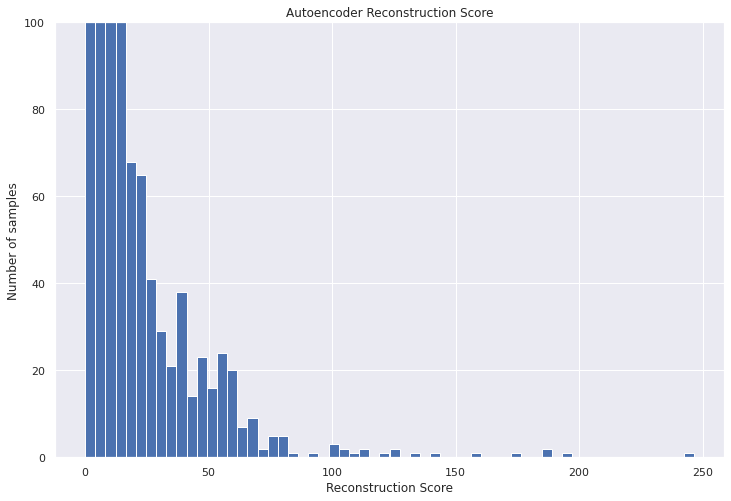

In [ ]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('Autoencoder Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

In [ ]:
X_tt = encoder.predict(X_val)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])
rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)
top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

In [ ]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1

print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', round(len(top_scores_idx) / len(X_val) * 100,4), '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.23      0.54      0.32        95

    accuracy                           1.00     56746
   macro avg       0.62      0.77      0.66     56746
weighted avg       1.00      1.00      1.00     56746

Rate of transations to investigate: 0.3859 %


In [ ]:
X_enc_tsne = encoder.predict(X_train)
X_enc_tsne = pd.DataFrame(X_enc_tsne, index=X_train.index)

X_enc_tsne['Class'] = y_train
normal_sample = X_enc_tsne[X_enc_tsne['Class'] == 0].sample(2000)
df_fraud = X_enc_tsne[X_enc_tsne['Class'] == 1]
df_tsne = normal_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

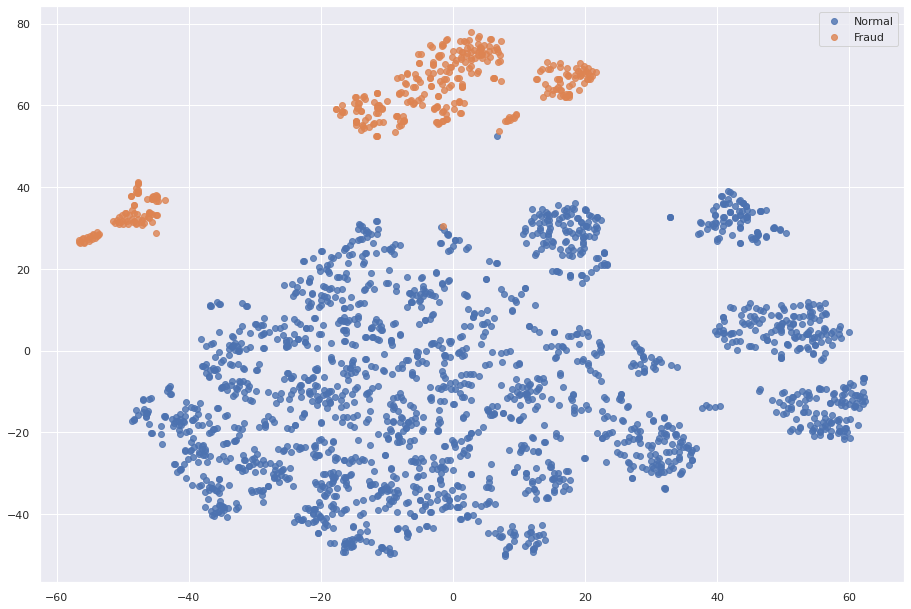

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1], alpha=0.8, label='Normal')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1], alpha=0.8, label='Fraud')
ax.legend(loc='best')